In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# 데이터 치환 및 변형

## 함수 사용하여 데이터 변형

In [2]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic['class'][:5]

0    Third
1    First
2    Third
3    First
4    Third
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [5]:
titanic['class'].str.lower()[:5]
#class열에 있는 데이터의 자료형은 범주형이며 이들은 문자열로 표현되어 있음. df[열이름].str.lower()[:5]-> 문자열(카테고리)인 열의 값을 모두 소문자로 만들고 위에서 5개를 고른다. 
#참고로 기본값에 영향을 주지 못한다.

0    third
1    first
2    third
3    first
4    third
Name: class, dtype: object

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
titanic['class'] = titanic['class'].str.lower()

In [8]:
#람다: 함수를 한줄로 표현한 것 lambda 매개변수 : 표현식
(lambda x,y : x+y)(10,20)

30

In [30]:
#맵(map)과 람다(lambda)활용법
#map(함수, 리스트)
#리스트로부터 원소를 하나씩 꺼내서 함수를 적용시킨 다음, 그 결과를 새로운 리스트에 담아준답니다.
list(map(lambda x: x ** 2, range(5)))

[0, 1, 4, 9, 16]

In [31]:
#df[열].map(lambda x: x.lower()) ->열에 있는 문자열 값 하나씩 x에 대입해서 소문자로 만든다.
titanic['class'] = titanic['class'].map(lambda x: x.lower())

In [32]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,first,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,first,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,third,man,True,NaN,Southampton,no,True


In [34]:
#map 메소드와 파이썬 딕셔너리를 사용하여 정해진 값으로 변환할 수 있음 
class_map = {'first': 1, 'second':2, 'third':3} #이전 것 : 변경할 것

In [35]:
titanic['class'].map(class_map)[:5] #first인 값은 1로 변환 ... 위에서 5개만 골라서 반환 

0    3
1    1
2    3
3    1
4    3
Name: class, dtype: int64

In [36]:
titanic['class'] = titanic['class'].map(class_map)

In [37]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,3,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,1,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,3,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,1,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,3,man,True,NaN,Southampton,no,True


## 값 치환하기 (replace)

In [38]:
exam_data = {
    '국어':[50, 20, 0, 30], '수학':[90, 0, 80, 50],
    '영어':[100, 10, 90, 0], '음악':[0, 80, 100, 29]
}
df = pd.DataFrame(exam_data, index = ['기범', '혜리', '동엽', '동현'])
df

,국어,수학,영어,음악
기범,50,90,100,0
혜리,20,0,10,80
동엽,0,80,90,100
동현,30,50,0,29


In [39]:
df['국어'].replace([0, 10, 20], 30) #국어열에서 값이 0 10 20 인 것들은 모두 30으로 대체함. df의 최소, 최대를 한정지을 때 사용

기범    50
혜리    30
동엽    30
동현    30
Name: 국어, dtype: int64

In [40]:
df['국어'].replace([0, 10, 20], [5, 15, 25]) #국어열에서 0인것은 5 10인 것은 15 20 인것은 25 로 변환함. 마치 딕셔너리와 비슷

기범    50
혜리    25
동엽     5
동현    30
Name: 국어, dtype: int64

In [41]:
exam_data = {
    '국어':[100, 80, 0, 30], '수학':[90, 0, 80, 50],
    '영어':[100, 10, 90, 0], '음악':[0, 80, 100, 29]
}
df = pd.DataFrame(exam_data, index = ['기범', '혜리', '동엽', '동현'])
df

,국어,수학,영어,음악
기범,100,90,100,0
혜리,80,0,10,80
동엽,0,80,90,100
동현,30,50,0,29


In [42]:
df.replace(0, 10) #모든 df의 값중 0 을 10으로 바꿈 

,국어,수학,영어,음악
기범,100,90,100,10
혜리,80,10,10,80
동엽,10,80,90,100
동현,30,50,10,29


In [43]:
df.replace([30, 20, 10], 0)

,국어,수학,영어,음악
기범,100,90,100,0
혜리,80,0,0,80
동엽,0,80,90,100
동현,0,50,0,29


## 특잇값 제외

In [44]:
#randn(행,열) 정규분포(평균0 std 1)반환
df = pd.DataFrame(np.random.randn(100, 4), columns = ['col1', 'col2', 'col3', 'col4'])
df.head()

,col1,col2,col3,col4
0,-1.174689,-0.405705,-0.695738,-0.828042
1,-0.349601,1.862484,0.223747,0.238412
2,-0.149960,0.174521,-1.021596,0.632309
3,-0.693322,-0.130661,0.357523,0.690338
4,-0.396187,1.246483,3.022166,1.221598


In [45]:
df.describe() #최대최소를 확인하여서 집단에서 특이한 값(너무크거나 작은)확인, 이에 따라 특이값 기준 정하고 

,col1,col2,col3,col4
count,100.000000,100.000000,100.000000,100.000000
mean,0.034837,0.196966,-0.015797,-0.092181
std,0.994402,0.923361,1.006389,0.940458
min,-2.780473,-2.298495,-2.501903,-2.317512
25%,-0.626924,-0.436289,-0.657873,-0.631062
50%,-0.033249,0.118000,-0.016459,-0.076349
75%,0.696340,0.768529,0.584097,0.482442
max,2.637155,2.632922,3.022166,2.224540


In [46]:
col = df['col2'] #df의 col2열의 값을 할당하고 
col[np.abs(col) > 2] #col의 값의 절대값중 2를 넘는 것만 반환 : 특이값을 확인 

17    2.011982
37    2.632922
45   -2.298495
Name: col2, dtype: float64

In [47]:
df.head()

,col1,col2,col3,col4
0,-1.174689,-0.405705,-0.695738,-0.828042
1,-0.349601,1.862484,0.223747,0.238412
2,-0.149960,0.174521,-1.021596,0.632309
3,-0.693322,-0.130661,0.357523,0.690338
4,-0.396187,1.246483,3.022166,1.221598


In [51]:
df[np.abs(df) > 2].head() #특이값 확인하는 것은 특정행 뿐만아니라 전체를 대상으로 할 수 있으며
                          #값이 NaN으로 나온 것은 특이값 기준에 맞지 않는다는 의미 
                          #이전에 어떤 특정행을 고르면 당연히 NaN이 뜨질 않음. 비교하자.

,col1,col2,col3,col4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,3.022166,NaN


In [49]:
df[(np.abs(df) > 2).any(1)][:5] #어떤 행과 열에 속한 값이 특이값 기준을 만족하면 행과 열에 있는 모든 데이터를 표시함.
                                #위에서 5개를 선택함, 인덱스 0,1,2,3,4가 아니라 

,col1,col2,col3,col4
4,-0.396187,1.246483,3.022166,1.221598
10,-2.350426,1.419003,2.146828,-1.544813
14,0.893370,1.869595,-2.095243,0.492279
17,-0.133605,2.011982,-1.144337,0.475435
29,0.654129,-0.607378,-0.688158,2.224540


In [53]:
df[np.abs(df) > 2] = np.sign(df) * 2 #df전체에서 절대값이 2가 넘는 값은 = 해당 값의 부호(양수1, 음수-1) 곱 2 : 즉 최대 최소  2 -2

In [54]:
df.head()

,col1,col2,col3,col4
0,-1.174689,-0.405705,-0.695738,-0.828042
1,-0.349601,1.862484,0.223747,0.238412
2,-0.149960,0.174521,-1.021596,0.632309
3,-0.693322,-0.130661,0.357523,0.690338
4,-0.396187,1.246483,2.000000,1.221598


In [55]:
df.describe()

,col1,col2,col3,col4
count,100.000000,100.000000,100.000000,100.000000
mean,0.035857,0.193502,-0.018521,-0.088356
std,0.942957,0.900498,0.956842,0.921513
min,-2.000000,-2.000000,-2.000000,-2.000000
25%,-0.626924,-0.436289,-0.657873,-0.631062
50%,-0.033249,0.118000,-0.016459,-0.076349
75%,0.696340,0.768529,0.584097,0.482442
max,2.000000,2.000000,2.000000,2.000000


## 데이터 샘플링

In [56]:
df = pd.DataFrame(np.random.randn(100, 4), columns = ['col1', 'col2', 'col3', 'col4'])
df.head()

,col1,col2,col3,col4
0,0.575077,1.097699,0.743291,-2.318082
1,1.176523,0.956435,0.632865,-0.583059
2,1.436221,0.085472,2.702971,1.123159
3,-1.203515,0.053851,1.887038,-0.885950
4,0.522543,0.990587,0.065719,1.806355


In [57]:
sampler = np.random.permutation(100) #0~99의 값을 랜덤하게 배열한 다차원배열(ndarray)를 반환
sampler

array([70, 44, 30, 35, 75, 14, 86,  1, 57, 28, 22, 89, 82, 91, 36, 43, 47,
       18, 60,  9, 85,  4, 87, 48, 26, 68,  2,  7, 92,  5,  0, 40, 42, 80,
       24, 34, 64, 15, 23, 97,  3, 59, 67, 51, 63, 11, 88, 53, 62, 79, 38,
       12, 56, 29, 27, 31, 32, 20, 73, 50, 10, 94, 84, 95, 98, 58, 96, 99,
       83, 74, 61, 16, 33, 81, 77, 55, 21, 17, 37, 46, 45, 39,  6, 69, 66,
       54, 72, 52, 41, 19, 76, 13,  8, 78, 49, 90, 25, 65, 93, 71])

In [58]:
df.take(sampler).head() #df.take(sampler) sampler 다차원 배열의 값 순서대로 df의 index위치를 변경시킴 

,col1,col2,col3,col4
70,-1.625254,0.301149,0.288661,1.009280
44,-0.616206,-0.961875,0.532834,0.641433
30,-0.803123,1.065766,-1.089546,-0.350034
35,0.382948,0.856471,0.156574,0.077560
75,0.982891,-0.424331,0.517526,-0.398047


In [59]:
df.sample(n=5) #데이터프레임 중 5개의 행을 랜덤 선택하여 반환 

,col1,col2,col3,col4
15,-1.089102,1.035568,-1.726454,0.051161
64,-0.520392,-0.395696,0.258363,-1.813464
45,0.573708,1.108238,0.058819,-0.231972
1,1.176523,0.956435,0.632865,-0.583059
36,-1.844935,-0.601290,-1.038708,-1.043954


In [60]:
df.sample(frac=0.1) #데이터 프레임의 행 개수의 0.1개 만큼 랜덤 선택하여 반환 

,col1,col2,col3,col4
96,0.667854,-1.395912,0.959979,0.574555
10,0.764591,-0.739856,-1.167715,-1.911232
19,-0.120843,0.538252,-2.069968,-0.926698
69,-1.201903,0.289194,-0.587920,-0.534205
5,-0.901979,-0.731449,1.005190,-0.724262
12,-0.822943,-0.978935,0.273994,1.064438
16,1.621146,0.859128,1.676138,-0.871395
98,0.074251,-0.546957,-0.181895,0.478698
95,0.397141,-0.549670,-0.502179,-0.926432
79,1.024474,0.587776,0.765398,-1.487810


In [61]:
df.sample(n=10, replace=True) #복원추출 : 뽑힌것 또 뽑힐 수 있음 

,col1,col2,col3,col4
39,1.371291,0.374699,-1.094655,-0.264766
14,0.083513,-3.258970,-1.295723,-0.451520
35,0.382948,0.856471,0.156574,0.077560
36,-1.844935,-0.601290,-1.038708,-1.043954
91,-0.703517,1.256080,-1.451316,-0.174839
74,-1.075431,0.286062,0.054638,-0.219297
93,1.705093,0.739368,1.681841,0.352810
4,0.522543,0.990587,0.065719,1.806355
60,0.621571,-0.162923,0.482860,-0.627828
29,-0.977258,-0.572475,-0.991155,-1.442417


In [62]:
data = pd.Series([5, 10, -3, 1, -2, -5])
draws = data.sample(n=10, replace=True) #원소의 수보다 더 많은 샘플링 가능, 당연히 중복될 수 밖에 없음 
draws

0     5
5    -5
3     1
5    -5
3     1
4    -2
3     1
1    10
3     1
3     1
dtype: int64

# 연속형 데이터 범주화

## cut 메소드

In [64]:
scores = [92, 48, 47, 83, 10, 48, 30, 52, 70, 92, 28, 83, 61, 43]
bins = [0, 20, 40, 60, 80, 100] #n개 , n-1개의 구간 

In [65]:
cats = pd.cut(scores, bins) #scores의 값을 설정한 구간 값으로 반환함. 92는 80~100이라는 범주로 반환됨.
cats #pd.cut으로 할당함 -> 자료형 :  범주형
#결과값에서 right의 의미는 오른쪽이 닫힌 구간이라는 의미

[(80, 100], (40, 60], (40, 60], (80, 100], (0, 20], ..., (80, 100], (20, 40], (80, 100], (60, 80], (40, 60]]
Length: 14
Categories (5, interval[int64, right]): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100]]

In [66]:
scores

[92, 48, 47, 83, 10, 48, 30, 52, 70, 92, 28, 83, 61, 43]

In [67]:
cats.codes #각 구간 범주는 해당 index가 매칭됨 , 다차원 배열로 반환 

array([4, 2, 2, 4, 0, 2, 1, 2, 3, 4, 1, 4, 3, 2], dtype=int8)

In [68]:
pd.value_counts(cats) #pd.value_counts(열) , pd.value_counts(범주형자료형)

(40, 60]     5
(80, 100]    4
(20, 40]     2
(60, 80]     2
(0, 20]      1
dtype: int64

In [69]:
pd.cut(scores, bins, right=False) #오른쪽이 열린구간, 왼쪽이 닫힌 구간

[[80, 100), [40, 60), [40, 60), [80, 100), [0, 20), ..., [80, 100), [20, 40), [80, 100), [60, 80), [40, 60)]
Length: 14
Categories (5, interval[int64, left]): [[0, 20) < [20, 40) < [40, 60) < [60, 80) < [80, 100)]

In [70]:
scores = [92, 48, 47, 83, 10, 48, 30, 52, 70, 92, 28, 83, 61, 43]
bins = [0, 20, 40, 60, 80, 100]

In [71]:
groups = ['Worst', 'Bad', 'Average', 'Good', 'Best']
cats = pd.cut(scores, bins, labels=groups) #pd.cut(리스트(자료),리스트(범위),리스트(범위라벨링))
cats

['Best', 'Average', 'Average', 'Best', 'Worst', ..., 'Best', 'Bad', 'Best', 'Good', 'Average']
Length: 14
Categories (5, object): ['Worst' < 'Bad' < 'Average' < 'Good' < 'Best']

In [72]:
cats.codes #범주의 index

array([4, 2, 2, 4, 0, 2, 1, 2, 3, 4, 1, 4, 3, 2], dtype=int8)

In [73]:
cats.categories #범주의 라벨링

Index(['Worst', 'Bad', 'Average', 'Good', 'Best'], dtype='object')

In [74]:
pd.value_counts(cats)

Average    5
Best       4
Bad        2
Good       2
Worst      1
dtype: int64

## 균등한 범위로 나누기

In [75]:
data = np.random.rand(1000) #0과 1사이의 수 1000개를 뽑음. 숫자 분포는 골구로 배치되어 있음. randn은 정규분포 골고루 x 종모양 분포
cats = pd.cut(data, 8, precision=2) #bins 안하고 그냥 숫자 : 구간을 직접 설정하는게 아니라 data의 최대최소 범위(여기서는 0과1)를 8등분한 것을 범위로
                                    #구간이 딱 안나눠 떨어질때 소수점 2자리까지

In [76]:
cats.categories

IntervalIndex([(-0.00096, 0.13], (0.13, 0.25], (0.25, 0.37], (0.37, 0.5], (0.5, 0.62], (0.62, 0.75], (0.75, 0.87], (0.87, 1.0]], dtype='interval[float64, right]')

In [77]:
data[:10]

array([0.14426096, 0.15492647, 0.85621193, 0.01015012, 0.21509199,
       0.70633715, 0.10578468, 0.71676599, 0.28247434, 0.09229598])

In [78]:
cats.codes[:10]

array([1, 1, 6, 0, 1, 5, 0, 5, 2, 0], dtype=int8)

In [79]:
pd.value_counts(cats).sort_index() #index 오름차순으로 정렬

(-0.00096, 0.13]    122
(0.13, 0.25]        133
(0.25, 0.37]        131
(0.37, 0.5]         122
(0.5, 0.62]         140
(0.62, 0.75]        115
(0.75, 0.87]        103
(0.87, 1.0]         134
dtype: int64

<AxesSubplot:>

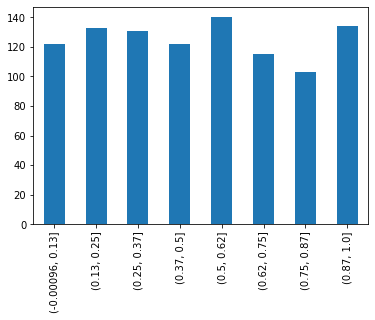

In [80]:
pd.value_counts(cats).sort_index().plot.bar()

In [81]:
data = np.random.randn(1000)
cats = pd.cut(data, 8, precision=2) 
#어떤 숫자가 나올지는 모르지만, min과 max의 8등분, 정규분포는 종모양 분포기 때문에 각 범주에 들어있는 데이터의 수가 다르다

In [82]:
cats.categories

IntervalIndex([(-3.53, -2.66], (-2.66, -1.79], (-1.79, -0.91], (-0.91, -0.043], (-0.043, 0.83], (0.83, 1.7], (1.7, 2.57], (2.57, 3.44]], dtype='interval[float64, right]')

In [83]:
pd.value_counts(cats).sort_index()

(-3.53, -2.66]       4
(-2.66, -1.79]      34
(-1.79, -0.91]     147
(-0.91, -0.043]    309
(-0.043, 0.83]     301
(0.83, 1.7]        157
(1.7, 2.57]         45
(2.57, 3.44]         3
dtype: int64

<AxesSubplot:>

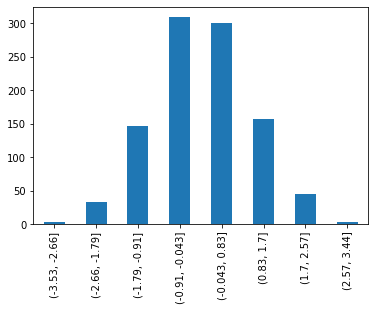

In [84]:
pd.value_counts(cats).sort_index().plot.bar()

## 데이터 개수를 균등하게 나누기

In [85]:
data = np.random.randn(1000)
cats = pd.qcut(data, 8, precision=2) #pd.qcut 각 구간에 균등한 데이터의 수가 들어오도록 구간을 자른다. 구간의 길이는 다르다

In [86]:
cats.categories

IntervalIndex([(-2.9699999999999998, -1.1], (-1.1, -0.61], (-0.61, -0.31], (-0.31, 0.0099], (0.0099, 0.32], (0.32, 0.66], (0.66, 1.15], (1.15, 3.42]], dtype='interval[float64, right]')

In [87]:
pd.value_counts(cats).sort_index()

(-2.9699999999999998, -1.1]    125
(-1.1, -0.61]                  125
(-0.61, -0.31]                 125
(-0.31, 0.0099]                125
(0.0099, 0.32]                 125
(0.32, 0.66]                   125
(0.66, 1.15]                   125
(1.15, 3.42]                   125
dtype: int64

<AxesSubplot:>

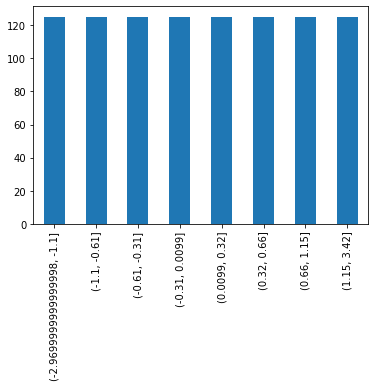

In [88]:
pd.value_counts(cats).sort_index().plot.bar()

# 더미 변수 사용하기
#### 머신러닝 모델을 위한 범주형 데이터의 변환 방법: 문자열로 이루어진 범주는 모두 숫자로 변환한다.
#### one-hot encoding : ex) 남자, 여자, 남자이면서 여자는 불가능
#### multi-hot encoding # ex)코믹, 액션, 코믹이면서 액션 가능
#### k개의 범주 값을 0/1값을 가지는 k개 차원의 벡터로 변환, 이 변환된 값을 더미라고 한다.


In [89]:
df = pd.DataFrame({
    'col1': ['c', 'b', 'd', 'a', 'a', 'e'],
    'col2': [8, 2, 1, 5, 3, 2]
})
df

,col1,col2
0,c,8
1,b,2
2,d,1
3,a,5
4,a,3
5,e,2


In [90]:
#머신러닝을 위한 data를 만들기 위해 문자열 범주를 숫자로 만들어야함. 여기서 a,b,c,d,e는 a이면서 b가 아니니 one hot encoding한다 라고함
pd.get_dummies(df['col1']) #고유값이 열이 되고 인덱스에 맞게 5차원 벡터가 부여됨 

,a,b,c,d,e
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0
5,0,0,0,0,1


In [91]:
df #아직 적용 안됨

,col1,col2
0,c,8
1,b,2
2,d,1
3,a,5
4,a,3
5,e,2


In [92]:
#적용하기 위해서 
dummies = pd.get_dummies(df['col1'])
df_new = df[['col2']].join(dummies) #더미값과 나머지 열을 조인
df_new

,col2,a,b,c,d,e
0,8,0,0,1,0,0
1,2,0,1,0,0,0
2,1,0,0,0,1,0
3,5,1,0,0,0,0
4,3,1,0,0,0,0
5,2,0,0,0,0,1


## 영화 데이터 가공

In [93]:
movies_df = pd.DataFrame({
    "id": [0,1,2,3,4,5],
    "name": ['movie1', 'movie2', 'movie3', 'movie4', 'movie5', 'movie6' ],
    "genre": ['comedy,fantasy', 'drama', 'comedy,drama',
             'thriller,action', 'action,fantasy', 'romance,drama']
})
movies_df

,id,name,genre
0,0,movie1,"comedy,fantasy"
1,1,movie2,drama
2,2,movie3,"comedy,drama"
3,3,movie4,"thriller,action"
4,4,movie5,"action,fantasy"
5,5,movie6,"romance,drama"


In [96]:
genres = []

for x in movies_df['genre']:
    genres.extend(x.split(',')) #movie_df의 genre행의 값을 하나씩 genres라는 빈리스트에 넣고 원소는 , 로 구분한다
print(genres)
genres = pd.unique(genres) #genres리스트의 고유값만 다차원배열로 반환 
genres

['comedy', 'fantasy', 'drama', 'comedy', 'drama', 'thriller', 'action', 'action', 'fantasy', 'romance', 'drama']


array(['comedy', 'fantasy', 'drama', 'thriller', 'action', 'romance'],
      dtype=object)

In [97]:
zero_matix = np.zeros((len(movies_df), len(genres)), dtype=np.int8)
#len(movies_df) 데이터프레임의 행의 수를 반환
#multi-hot encoding을 위한 0으로 이루어진 더미 데이터프레임을 생성 
dummies = pd.DataFrame(zero_matix, columns = genres)
dummies

   id    name            genre
0   0  movie1   comedy,fantasy
1   1  movie2            drama
2   2  movie3     comedy,drama
3   3  movie4  thriller,action
4   4  movie5   action,fantasy
5   5  movie6    romance,drama
6


,comedy,fantasy,drama,thriller,action,romance
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0


In [102]:
movie1_genre = movies_df['genre'][0]
movie1_genre

'comedy,fantasy'

In [99]:
movie1_genre.split(',') #문자열.split(',')문자열을 ,로 구분하여 리스트 원소를 구성한다. 

['comedy', 'fantasy']

In [108]:
dummies.columns.get_indexer(movie1_genre.split(','))
#df.columns의 메소드 get_indexer의 인자로 리스트를 넣으면 리스트 원소에 해당하는 열의 인덱스를 다차원 배열로 반환한다.

array([0, 1], dtype=int64)

In [109]:
#enumerate
lsts = ['a','b','c']
for index, lst in enumerate(lsts):
    print(f"{index} : {lst}")

0 : a
1 : b
2 : c


In [110]:
for i, genres in enumerate(movies_df['genre']): #i = 0 , genres = 'comedy,fantasy'
    indices = dummies.columns.get_indexer(genres.split(','))
    #genres.split(',') : [comedy, fantasy]
    #dumies의 열 중 comedy, fantasy에 해당하는 index를 ndarray형으로 반환 indices = array([0,1])
    dummies.iloc[i, indices] = 1 #영행렬인 dummies의 0행, 0열,1열에 해당하는 원소의 값을 1로 만든다.
    
    

In [111]:
dummies

,comedy,fantasy,drama,thriller,action,romance
0,1,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,1,0,0,0
3,0,0,0,1,1,0
4,0,1,0,0,1,0
5,0,0,1,0,0,1


In [112]:
movies_df

,id,name,genre
0,0,movie1,"comedy,fantasy"
1,1,movie2,drama
2,2,movie3,"comedy,drama"
3,3,movie4,"thriller,action"
4,4,movie5,"action,fantasy"
5,5,movie6,"romance,drama"


In [113]:
new_movies_df = movies_df.join(dummies) #반영
new_movies_df

,id,name,genre,comedy,fantasy,drama,thriller,action,romance
0,0,movie1,"comedy,fantasy",1,1,0,0,0,0
1,1,movie2,drama,0,0,1,0,0,0
2,2,movie3,"comedy,drama",1,0,1,0,0,0
3,3,movie4,"thriller,action",0,0,0,1,1,0
4,4,movie5,"action,fantasy",0,1,0,0,1,0
5,5,movie6,"romance,drama",0,0,1,0,0,1


## cut 메소드를 사용한 더미

In [114]:
data = np.random.rand(10)
data

array([0.05659737, 0.36462527, 0.92864293, 0.79836165, 0.48472438,
       0.85035294, 0.66974468, 0.81072444, 0.83828812, 0.40851957])

In [115]:
bins = [0, 0.25, 0.5, 0.75, 1]

In [118]:
cats = pd.cut(data, bins)

In [119]:
pd.value_counts(cats).sort_index()

(0.0, 0.25]    1
(0.25, 0.5]    3
(0.5, 0.75]    1
(0.75, 1.0]    5
dtype: int64

In [120]:
dummy_data = pd.get_dummies(pd.cut(data, bins))
dummy_data
#pd.get_dummies(pd.cut(data,bins))
#연속형 데이터를 cut메소드로 나누면 각 구간은 범주형 변수가 됨 
#각 구간에 해당하는 범주형 변수를 더미변수로 변환할 수 있음 


,"(0.0, 0.25]","(0.25, 0.5]","(0.5, 0.75]","(0.75, 1.0]"
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0
5,0,0,0,1
6,0,0,1,0
7,0,0,0,1
8,0,0,0,1
9,0,1,0,0
